In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame = pd.read_csv("/content/project_feature.csv")
data_frame.head()

,Unnamed: 0,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,0,male,White,60 - 69,193.04,115.7,NaN,0.0,0.0,2.5,2.60,*1/*1,A/G,49.0
1,1,female,White,50 - 59,176.53,144.2,NaN,0.0,0.0,2.5,2.15,*1/*1,A/A,42.0
2,2,female,White,40 - 49,162.56,77.1,NaN,0.0,0.0,2.5,1.90,*1/*1,G/G,53.0
3,3,male,White,60 - 69,182.24,90.7,NaN,0.0,0.0,2.5,2.40,*1/*1,A/G,28.0
4,4,male,White,50 - 59,167.64,72.6,NaN,0.0,0.0,2.5,1.90,*1/*3,A/G,42.0


In [3]:
data_frame.shape

(6161, 14)

In [4]:
data_frame = data_frame.iloc[:,1:]

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5696 non-null   object 
 1   Race (Reported)                                                    5194 non-null   object 
 2   Age                                                                5658 non-null   object 
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           3283 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  

As per the paper we can see that representative clinical or demographic characteristics like genotype combinations, race, and use or nonuse of amiodarone

In [6]:
data_frame.columns

Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR', 'INR on Reported Therapeutic Dose of Warfarin',
       'Cyp2C9 genotypes',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',
       'Therapeutic Dose of Warfarin'],
      dtype='object')

In [7]:
columns_required = ["Race (Reported)","Age","Height (cm)","Weight (kg)","Amiodarone (Cordarone)","VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T","Cyp2C9 genotypes","Therapeutic Dose of Warfarin"]

In [8]:
data_frame_reg = data_frame[columns_required]
data_frame_reg.head()

,Race (Reported),Age,Height (cm),Weight (kg),Amiodarone (Cordarone),VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Cyp2C9 genotypes,Therapeutic Dose of Warfarin
0,White,60 - 69,193.04,115.7,0.0,A/G,*1/*1,49.0
1,White,50 - 59,176.53,144.2,0.0,A/A,*1/*1,42.0
2,White,40 - 49,162.56,77.1,0.0,G/G,*1/*1,53.0
3,White,60 - 69,182.24,90.7,0.0,A/G,*1/*1,28.0
4,White,50 - 59,167.64,72.6,0.0,A/G,*1/*3,42.0


In [9]:
data_frame_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 8 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Race (Reported)                                                    5194 non-null   object 
 1   Age                                                                5658 non-null   object 
 2   Height (cm)                                                        4554 non-null   float64
 3   Weight (kg)                                                        5413 non-null   float64
 4   Amiodarone (Cordarone)                                             4182 non-null   float64
 5   VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T  4046 non-null   object 
 6   Cyp2C9 genotypes                                                   5567 non-null   object 
 7   Therapeutic Dose of Warfa

As there are nan values but if we drop those rows we loose a lot of data so we can replace them with -1 so that it will be less significant

In [10]:
new_data = {0.: 0, 1.: 1, np.nan: -1}
data_frame_reg["Amiodarone (Cordarone)"].replace(new_data, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Data set cleaning converting all the attributes into an integer from categorical data. And changing all object values from the above data to an integer value.

In [11]:
data = data_frame_reg["Age"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "60 - 69":
    new_data[i] = 60
  elif str(i) == "50 - 59":
    new_data[i] = 50
  elif str(i) == "40 - 49":
    new_data[i] = 40
  elif str(i) == "70 - 79":
    new_data[i] = 70
  elif str(i) == "30 - 39":
    new_data[i] = 30
  elif str(i) == "80 - 89":
    new_data[i] = 80
  elif str(i) == "90+":
    new_data[i] = 90
  elif str(i) == "20 - 29":
    new_data[i] = 20
  elif str(i) == "10 - 19":
    new_data[i] = 10
  else:
    new_data[i] = -1
new_data

['60 - 69' '50 - 59' '40 - 49' '70 - 79' '30 - 39' '80 - 89' '90+'
 '20 - 29' '10 - 19' nan]


{'60 - 69': 60,
 '50 - 59': 50,
 '40 - 49': 40,
 '70 - 79': 70,
 '30 - 39': 30,
 '80 - 89': 80,
 '90+': 90,
 '20 - 29': 20,
 '10 - 19': 10,
 nan: -1}

In [12]:
data_frame_reg["Age"].replace(new_data, inplace=True)

In [13]:
data = data_frame_reg["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "A/A":
    new_data[i] = 0
  elif str(i) == " A/G":
    new_data[i] = 1
  elif str(i) == "G/G":
    new_data[i] = 2
  else:
    new_data[i] = -1
new_data

['A/G' 'A/A' 'G/G' nan]


{'A/G': -1, 'A/A': 0, 'G/G': 2, nan: -1}

In [14]:
data_frame_reg["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"].replace(new_data, inplace=True)

In [15]:
data = data_frame_reg["Cyp2C9 genotypes"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "*1/*1":
    new_data[i] = 0
  elif str(i) == "*1/*2":
    new_data[i] = 1
  elif str(i) == "*1/*3":
    new_data[i] = 2
  elif str(i) == "*2/*2":
    new_data[i] = 3
  elif str(i) == "*2/*3":
    new_data[i] = 4
  elif str(i) == "*3/*3":
    new_data[i] = 5
  else:
    new_data[i] = -1
new_data

['*1/*1' '*1/*3' '*1/*2' '*2/*2' '*2/*3' '*3/*3' nan '*1/*5' '*1/*13'
 '*1/*14' '*1/*11' '*1/*6']


{'*1/*1': 0,
 '*1/*3': 2,
 '*1/*2': 1,
 '*2/*2': 3,
 '*2/*3': 4,
 '*3/*3': 5,
 nan: -1,
 '*1/*5': -1,
 '*1/*13': -1,
 '*1/*14': -1,
 '*1/*11': -1,
 '*1/*6': -1}

In [16]:
data_frame_reg["Cyp2C9 genotypes"].replace(new_data, inplace=True)

In [17]:
data = data_frame_reg["Race (Reported)"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "Asian":
    new_data[i] = 0
  elif str(i) == "Black" or str(i) == "African-American":
    new_data[i] = 1
  elif str(i) == "Caucasian" or str(i) == "White":
    new_data[i] = 2
  else:
    new_data[i] = -1
new_data

['White' 'Other Mixed Race' 'African-American' 'Black' 'Hispanic'
 'Japanese' 'Han Chinese' 'other' nan 'Asian' 'Korean' 'Caucasian'
 'Black or African American' 'Other' 'Intermediate' 'Malay' 'Chinese'
 'Indian' 'Black Caribbean' 'Other (Hungarian)' 'Other (Black British)'
 'Black African' 'Black other']


{'White': 2,
 'Other Mixed Race': -1,
 'African-American': 1,
 'Black': 1,
 'Hispanic': -1,
 'Japanese': -1,
 'Han Chinese': -1,
 'other': -1,
 nan: -1,
 'Asian': 0,
 'Korean': -1,
 'Caucasian': 2,
 'Black or African American': -1,
 'Other': -1,
 'Intermediate': -1,
 'Malay': -1,
 'Chinese': -1,
 'Indian': -1,
 'Black Caribbean': -1,
 'Other (Hungarian)': -1,
 'Other (Black British)': -1,
 'Black African': -1,
 'Black other': -1}

In [18]:
data_frame_reg["Race (Reported)"].replace(new_data, inplace=True)

In [19]:
data_frame_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 8 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Race (Reported)                                                    6161 non-null   int64  
 1   Age                                                                6161 non-null   int64  
 2   Height (cm)                                                        4554 non-null   float64
 3   Weight (kg)                                                        5413 non-null   float64
 4   Amiodarone (Cordarone)                                             6161 non-null   float64
 5   VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T  6161 non-null   int64  
 6   Cyp2C9 genotypes                                                   6161 non-null   int64  
 7   Therapeutic Dose of Warfa

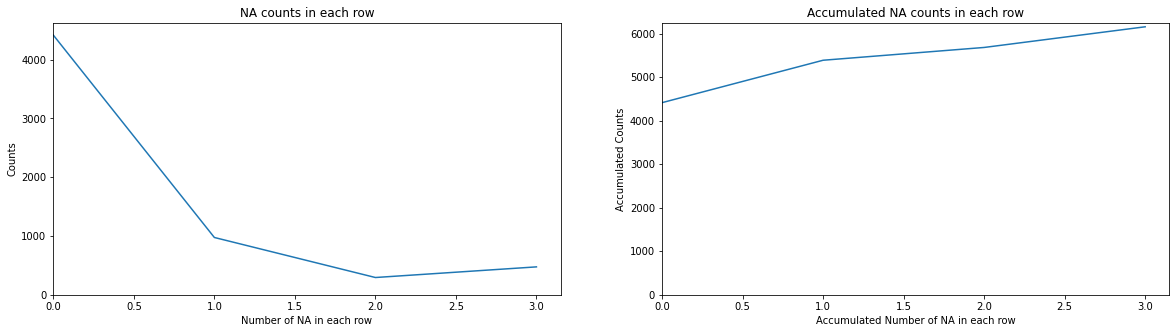

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('NA counts in each row')
plt.plot(data_frame_reg.isna().sum(axis=1).value_counts().sort_index())
plt.xlabel('Number of NA in each row')
plt.ylabel('Counts')
plt.xlim(0)
plt.ylim(0)

plt.subplot(1,2,2)
plt.title('Accumulated NA counts in each row')
plt.plot(data_frame_reg.isna().sum(axis=1).value_counts().sort_index().cumsum())
plt.xlabel('Accumulated Number of NA in each row')
plt.ylabel('Accumulated Counts')
plt.xlim(0)
_= plt.ylim(0)

Here we can remove nan values for a row which have more than 1 attribute as nan.

In [21]:
data_frame_reg = data_frame_reg.dropna(thresh=1.5)

In [22]:
data_frame_reg = data_frame_reg[data_frame_reg['Therapeutic Dose of Warfarin'].notna()]
data_frame_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 5699
Data columns (total 8 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Race (Reported)                                                    5528 non-null   int64  
 1   Age                                                                5528 non-null   int64  
 2   Height (cm)                                                        4447 non-null   float64
 3   Weight (kg)                                                        5256 non-null   float64
 4   Amiodarone (Cordarone)                                             5528 non-null   float64
 5   VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T  5528 non-null   int64  
 6   Cyp2C9 genotypes                                                   5528 non-null   int64  
 7   Therapeutic Dose of Warfa

Instead of reducing the data we make the height and Weight -1 for nan values so that we can train model with less importance to those feature.

In [23]:
data_frame_reg["Height (cm)"].replace({np.nan: -1},inplace = True)
data_frame_reg["Weight (kg)"].replace({np.nan: -1},inplace = True)

In [24]:
data_frame_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 5699
Data columns (total 8 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Race (Reported)                                                    5528 non-null   int64  
 1   Age                                                                5528 non-null   int64  
 2   Height (cm)                                                        5528 non-null   float64
 3   Weight (kg)                                                        5528 non-null   float64
 4   Amiodarone (Cordarone)                                             5528 non-null   float64
 5   VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T  5528 non-null   int64  
 6   Cyp2C9 genotypes                                                   5528 non-null   int64  
 7   Therapeutic Dose of Warfa

In [25]:
data_frame_reg.isna().sum()

Race (Reported)                                                      0
Age                                                                  0
Height (cm)                                                          0
Weight (kg)                                                          0
Amiodarone (Cordarone)                                               0
VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T    0
Cyp2C9 genotypes                                                     0
Therapeutic Dose of Warfarin                                         0
dtype: int64

(0.0, 5832.04)

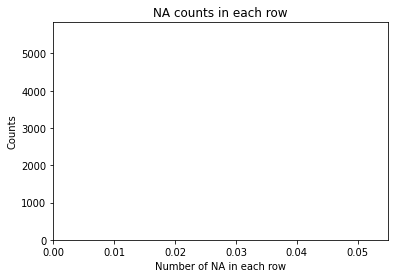

In [26]:
plt.title('NA counts in each row')
plt.plot(data_frame_reg.isna().sum(axis=1).value_counts().sort_index())
plt.xlabel('Number of NA in each row')
plt.ylabel('Counts')
plt.xlim(0)
plt.ylim(0)

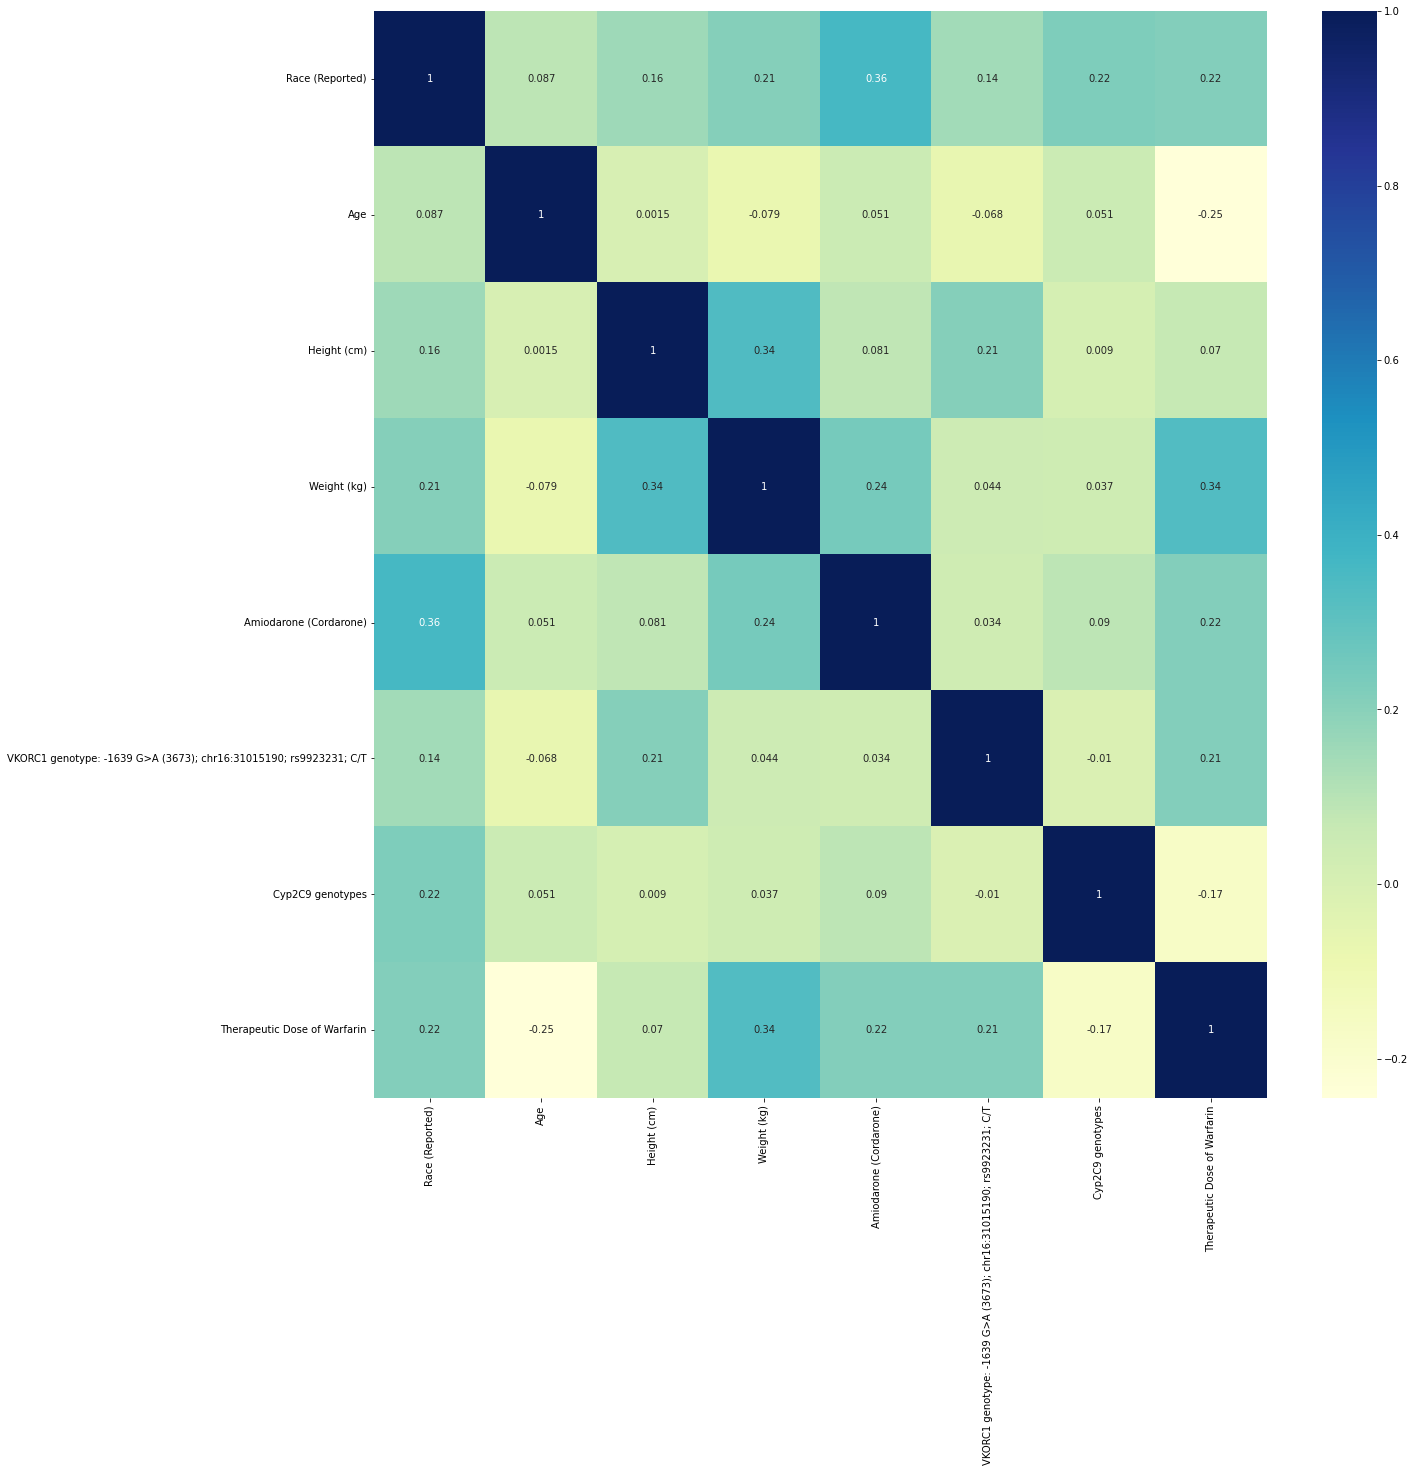

In [27]:
import seaborn as sns
plt.figure(figsize=(20,20))
hm=sns.heatmap(data_frame_reg[data_frame_reg.columns].corr(method='pearson').values,annot=True,
               xticklabels=data_frame_reg.columns,
               yticklabels=data_frame_reg.columns,
               cmap='YlGnBu')

Now there are no nan values so that we can apply ur ML model.

Firstly lets split the data so that we can see validate our model.

In [28]:
X = data_frame_reg.drop('Therapeutic Dose of Warfarin',axis =1)
y = data_frame_reg['Therapeutic Dose of Warfarin']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Her we are using Linear regression model.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object
poly = PolynomialFeatures(degree=3)

X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))

0.4485004992085472


In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse = mean_squared_error(y_test, y_pred)
mse

221.35536660759783

Here we can see that Mean squared error is less comparitavely. 221 over the whole data is less which is the deviation from the orginal value to the machine detected value.

Logistic Regression

In [35]:
data_frame.columns

Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR', 'INR on Reported Therapeutic Dose of Warfarin',
       'Cyp2C9 genotypes',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',
       'Therapeutic Dose of Warfarin'],
      dtype='object')

In [36]:
columns_required = ["Race (Reported)","Age", "Diabetes", "Amiodarone (Cordarone)","Target INR","Cyp2C9 genotypes", "VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T" ,"Therapeutic Dose of Warfarin"]

In [37]:
data_frame_log = data_frame[columns_required]
data_frame_log.head()

,Race (Reported),Age,Diabetes,Amiodarone (Cordarone),Target INR,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,White,60 - 69,NaN,0.0,2.5,*1/*1,A/G,49.0
1,White,50 - 59,NaN,0.0,2.5,*1/*1,A/A,42.0
2,White,40 - 49,NaN,0.0,2.5,*1/*1,G/G,53.0
3,White,60 - 69,NaN,0.0,2.5,*1/*1,A/G,28.0
4,White,50 - 59,NaN,0.0,2.5,*1/*3,A/G,42.0


In [38]:
data_frame_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 8 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Race (Reported)                                                    5194 non-null   object 
 1   Age                                                                5658 non-null   object 
 2   Diabetes                                                           3283 non-null   float64
 3   Amiodarone (Cordarone)                                             4182 non-null   float64
 4   Target INR                                                         1259 non-null   float64
 5   Cyp2C9 genotypes                                                   5567 non-null   object 
 6   VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T  4046 non-null   object 
 7   Therapeutic Dose of Warfa

As there are less Target INR we can ignore it. and Diabetes nan we can fill with -1 so that it make the machine think less importance.

In [39]:
data_frame_log["Diabetes"].replace(np.nan,-1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


As there are too many nan values in Target INR we can ignore it.

In [40]:
data_frame_log.drop(columns=["Target INR"],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
data_frame_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 7 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Race (Reported)                                                    5194 non-null   object 
 1   Age                                                                5658 non-null   object 
 2   Diabetes                                                           6161 non-null   float64
 3   Amiodarone (Cordarone)                                             4182 non-null   float64
 4   Cyp2C9 genotypes                                                   5567 non-null   object 
 5   VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T  4046 non-null   object 
 6   Therapeutic Dose of Warfarin                                       5528 non-null   float64
dtypes: float64(3), object(4)


(0.0, 2779.3)

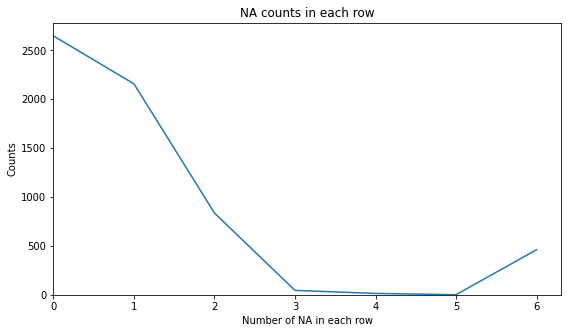

In [42]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('NA counts in each row')
plt.plot(data_frame_log.isna().sum(axis=1).value_counts().sort_index())
plt.xlabel('Number of NA in each row')
plt.ylabel('Counts')
plt.xlim(0)
plt.ylim(0)

In [43]:
data = data_frame_log["Race (Reported)"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "Asian":
    new_data[i] = 0
  elif str(i) == "Black" or str(i) == "African-American":
    new_data[i] = 1
  elif str(i) == "Caucasian" or str(i) == "White":
    new_data[i] = 2
  else:
    new_data[i] = -1
new_data

['White' 'Other Mixed Race' 'African-American' 'Black' 'Hispanic'
 'Japanese' 'Han Chinese' 'other' nan 'Asian' 'Korean' 'Caucasian'
 'Black or African American' 'Other' 'Intermediate' 'Malay' 'Chinese'
 'Indian' 'Black Caribbean' 'Other (Hungarian)' 'Other (Black British)'
 'Black African' 'Black other']


{'White': 2,
 'Other Mixed Race': -1,
 'African-American': 1,
 'Black': 1,
 'Hispanic': -1,
 'Japanese': -1,
 'Han Chinese': -1,
 'other': -1,
 nan: -1,
 'Asian': 0,
 'Korean': -1,
 'Caucasian': 2,
 'Black or African American': -1,
 'Other': -1,
 'Intermediate': -1,
 'Malay': -1,
 'Chinese': -1,
 'Indian': -1,
 'Black Caribbean': -1,
 'Other (Hungarian)': -1,
 'Other (Black British)': -1,
 'Black African': -1,
 'Black other': -1}

In [44]:
data_frame_log["Race (Reported)"].replace(new_data, inplace=True)

In [45]:
data = data_frame_log["Age"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "60 - 69":
    new_data[i] = 60
  elif str(i) == "50 - 59":
    new_data[i] = 50
  elif str(i) == "40 - 49":
    new_data[i] = 40
  elif str(i) == "70 - 79":
    new_data[i] = 70
  elif str(i) == "30 - 39":
    new_data[i] = 30
  elif str(i) == "80 - 89":
    new_data[i] = 80
  elif str(i) == "90+":
    new_data[i] = 90
  elif str(i) == "20 - 29":
    new_data[i] = 20
  elif str(i) == "10 - 19":
    new_data[i] = 10
  else:
    new_data[i] = -1
new_data

['60 - 69' '50 - 59' '40 - 49' '70 - 79' '30 - 39' '80 - 89' '90+'
 '20 - 29' '10 - 19' nan]


{'60 - 69': 60,
 '50 - 59': 50,
 '40 - 49': 40,
 '70 - 79': 70,
 '30 - 39': 30,
 '80 - 89': 80,
 '90+': 90,
 '20 - 29': 20,
 '10 - 19': 10,
 nan: -1}

In [46]:
data_frame_log["Age"].replace(new_data, inplace=True)

In [47]:
data = data_frame_log["Cyp2C9 genotypes"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "*1/*1":
    new_data[i] = 0
  elif str(i) == "*1/*2":
    new_data[i] = 1
  elif str(i) == "*1/*3":
    new_data[i] = 2
  elif str(i) == "*2/*2":
    new_data[i] = 3
  elif str(i) == "*2/*3":
    new_data[i] = 4
  elif str(i) == "*3/*3":
    new_data[i] = 5
  else:
    new_data[i] = -1
new_data

['*1/*1' '*1/*3' '*1/*2' '*2/*2' '*2/*3' '*3/*3' nan '*1/*5' '*1/*13'
 '*1/*14' '*1/*11' '*1/*6']


{'*1/*1': 0,
 '*1/*3': 2,
 '*1/*2': 1,
 '*2/*2': 3,
 '*2/*3': 4,
 '*3/*3': 5,
 nan: -1,
 '*1/*5': -1,
 '*1/*13': -1,
 '*1/*14': -1,
 '*1/*11': -1,
 '*1/*6': -1}

In [48]:
data_frame_log["Cyp2C9 genotypes"].replace(new_data, inplace=True)

In [49]:
data = data_frame_log["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"].unique()
print(data)
new_data = {}
for i in data:
  if str(i) == "A/A":
    new_data[i] = 0
  elif str(i) == " A/G":
    new_data[i] = 1
  elif str(i) == "G/G":
    new_data[i] = 2
  else:
    new_data[i] = -1
new_data

['A/G' 'A/A' 'G/G' nan]


{'A/G': -1, 'A/A': 0, 'G/G': 2, nan: -1}

In [50]:
data_frame_log["VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"].replace(new_data, inplace=True)

In [51]:
new_data = {0.: 0, 1.: 1, np.nan: -1}
data_frame_log["Amiodarone (Cordarone)"].replace(new_data, inplace=True)

In [52]:
data_frame_log = data_frame_log.dropna(subset=['Therapeutic Dose of Warfarin',"Age"])

In [53]:
data_frame_log.isna().sum()

Race (Reported)                                                      0
Age                                                                  0
Diabetes                                                             0
Amiodarone (Cordarone)                                               0
Cyp2C9 genotypes                                                     0
VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T    0
Therapeutic Dose of Warfarin                                         0
dtype: int64

Converting Target attribute in to 2 categories with less than 30 as Low or 0 and above as 1.

In [54]:
data_frame_log["Therapeutic Dose of Warfarin"] = pd.cut(data_frame_log["Therapeutic Dose of Warfarin"],bins=[0,30,data_frame_log["Therapeutic Dose of Warfarin"].max()],labels=[0,1])

<ipython-input-54-31e2c0cadbf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_log["Therapeutic Dose of Warfarin"] = pd.cut(data_frame_log["Therapeutic Dose of Warfarin"],bins=[0,30,data_frame_log["Therapeutic Dose of Warfarin"].max()],labels=[0,1])


In [55]:
X = data_frame_log.drop('Therapeutic Dose of Warfarin',axis =1)
y = data_frame_log['Therapeutic Dose of Warfarin']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [57]:
from sklearn.svm import SVC

In [58]:
model = SVC(kernel="poly")
model.fit(x_train, y_train)

SVC(kernel='poly')

In [59]:
y_pred = model.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       607
           1       0.64      0.66      0.65       499

    accuracy                           0.68      1106
   macro avg       0.68      0.68      0.68      1106
weighted avg       0.68      0.68      0.68      1106



In [61]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

ExtraTreesClassifier(random_state=0)

In [62]:
y_pred = clf.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       607
           1       0.74      0.67      0.70       499

    accuracy                           0.74      1106
   macro avg       0.74      0.73      0.74      1106
weighted avg       0.74      0.74      0.74      1106



Here we have applied 2 different classifier and we see that Random Forest we are getting more accuracy and F-1 Score.

Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

In [94]:
nnClassifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,12,24,12,6,2), random_state=1)
nnClassifier.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 12, 24, 12, 6, 2),
              random_state=1, solver='lbfgs')

In [95]:
y_pred = nnClassifier.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       607
           1       0.69      0.57      0.62       499

    accuracy                           0.69      1106
   macro avg       0.69      0.68      0.68      1106
weighted avg       0.69      0.69      0.68      1106



LDA

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [98]:
ldaClassification = LinearDiscriminantAnalysis()
ldaClassification.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [99]:
y_pred = ldaClassification.predict(x_test)

In [100]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       607
           1       0.67      0.55      0.60       499

    accuracy                           0.68      1106
   macro avg       0.68      0.66      0.67      1106
weighted avg       0.68      0.68      0.67      1106



Navie Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

In [103]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [104]:
y_pred = gnb.predict(x_test)

In [105]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       607
           1       0.66      0.66      0.66       499

    accuracy                           0.70      1106
   macro avg       0.69      0.69      0.69      1106
weighted avg       0.70      0.70      0.70      1106



Here we can see all the models are having similar accuray due to the few outlier which are present and the nan values. There prediction is good enough as there F-1 score is 75% which is well prediction of the dosage in the range. The other important point is lack of large dataset.